In [1]:
pip install turicreate

     |████████████████████████████████| 91.9MB 91kB/s 
     |████████████████████████████████| 3.4MB 27.4MB/s 
     |████████████████████████████████| 327kB 36.5MB/s 
     |████████████████████████████████| 86.3MB 68kB/s 
     |████████████████████████████████| 450kB 41.7MB/s 
     |████████████████████████████████| 3.8MB 35.4MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=49830662064f4c46a7e378d1fd1935e69427288d205f8149b6749c1a8e180824
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=97f5b59273b1a02fdf47f699f28207e2b0827aa97b5a1d1c307ea2d99140d111
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Fo

In [200]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import turicreate
%matplotlib inline
print("Setup done")

Setup done


In [201]:
# can add all the data_visualization functions here, and invoke the function in main()
def data_visualization(dataframe,y='y'):
    
    # basic data analysis
    print('The shape of dataset in terms of rows and cols:\n', dataframe.shape)
    print('*'*100)
    print('Have a look at first 10 rows of the dataset: \n\n', dataframe.head(10))
    print('*'*100)
    print('Description about the dataset: \n\n', dataframe.describe())
    print('*'*100)
    print('Description about the dataset including the Categorical variables: \n\n', dataframe.describe(include = 'all'))
    print('*'*100)
    print('Dataset info: \n\n',dataframe.info())
    print('*'*100)
    print('Lets see the what are the output values wrt thier count: \n\n', dataframe[y].value_counts())
    print('*'*100)
    
    # univariate analysis
    sf = turicreate.SFrame(dataframe)
    print(sf.show())
    print(sf.plot())

In [207]:
def cleaning(bank):
    bank=bank.drop_duplicates()
    print("Duplicates are dropped if any")
    missing = bank.isnull().any().any()
    if missing == False:
        print("no missing values")
    else:
        print("missing values to be treated")
    bank.columns = [x.upper() for x in bank.columns]
    bank = bank.rename(columns = {'MARITAL': 'MARITAL_STATUS','DEFAULT': 'CREDIT', 'PDAYS':'CONTACTED_BEFORE',
                                    'PREVIOUS':'PREVIOUS_CAMPAIGN', 'POUTCOME':'PREVIOUS_CAMPAIGN_OUTCOME', 'Y':'SUBSCRIBED'})
    bank.head()
    list1=['JOB','MARITAL_STATUS','EDUCATION','CREDIT','HOUSING','LOAN','CONTACT','MONTH','PREVIOUS_CAMPAIGN_OUTCOME','SUBSCRIBED']
    for l in list1:
        sns.countplot(y=l, data=bank, order = bank[l].value_counts().index)
        plt.show()
    bank.hist(figsize=(10,10), xrot=-45)
    plt.show()
    sns.heatmap(bank.isnull())
    bank.isnull().sum()
    print(bank.isnull().values.any())
    if bank['CONTACTED_BEFORE'].max() <= 999:
        print('')
    else:
        bank = bank.drop(bank[bank['CONTACTED_BEFORE'].max() > 999].index)
    bank = bank[bank.JOB != 'unknown']
    bank = bank[bank.MARITAL_STATUS != 'unknown']
    bank = bank[bank.EDUCATION != 'unknown']
    bank.info()

    bank.head(20)
    sns.boxplot(x=bank['BALANCE'])
    bank[['BALANCE']].mean()
    bank['outliers'] = zscore(bank['BALANCE'])
    check = (bank['outliers']>3) | (bank['outliers']<-3 )
    bank = bank.drop(bank[check].index, axis = 0, inplace = False)
    bank = bank.drop('outliers', axis=1)
    sns.boxplot(x=bank['BALANCE'])
    bank.JOB.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)
    bank.MARITAL_STATUS.replace(['single', 'divorced'], 'single', inplace=True)
    bank.JOB.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)
    bank.JOB.replace(['admin.', 'management'], 'admin_management', inplace=True)
    bank.JOB.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)
    list1=['JOB','MARITAL_STATUS','EDUCATION','HOUSING','LOAN','MONTH','PREVIOUS_CAMPAIGN_OUTCOME','SUBSCRIBED']
    for l in list1:
        sns.countplot(y=l, data=bank, order = bank[l].value_counts().index)
        plt.show()
    bank["JOB"].replace({"blue-collar": 1,"admin_management": 2,"services": 3,"no_active_income": 4, "self-employed": 5, "housemaid": 6,"student": 7,}, inplace=True)
    bank["MARITAL_STATUS"].replace({"married": 1,"single": 2,}, inplace=True)
    bank["EDUCATION"].replace({"primary": 1,"secondary": 2,"tertiary": 3,}, inplace=True)
    bank["CREDIT"].replace({"no": 0,"yes": 1,}, inplace=True)
    bank["HOUSING"].replace({"no": 0,"yes": 1,}, inplace=True)
    bank["LOAN"].replace({"no": 0,"yes": 1,}, inplace=True)
    bank["CONTACT"].replace({"cellular": 0,"telephone": 1,"unknown":2}, inplace=True)
    bank["SUBSCRIBED"].replace({"no": 0,"yes": 1,}, inplace=True)
    bank["MONTH"].replace({"jan": 1,"feb": 2,"mar": 3,"apr": 4, "may": 5, "jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12,}, inplace=True)
    bank['PREVIOUS_CAMPAIGN_OUTCOME'].replace({"unknown": 0,"failure": 2,"other": 3,"success": 4,}, inplace=True)
    bank.head()
    bank.to_csv('cleaned_data.csv',index=False)
    return bank

In [208]:
def pre_processing(dataframe):
    print(dataframe.head())
    my_features=['AGE''JOB','MARITAL_STATUS','EDUCATION','CREDIT','BALANCE','HOUSING','LOAN','DAY','MONTH','CAMPAIGN','CONTACTED_BEFORE','PREVIOUS_CAMPAIGN','PREVIOUS_CAMPAIGN_OUTCOME','SUBSCRIBED']
    x = dataframe.drop(['SUBSCRIBED'], axis = 1)   
    y = dataframe['SUBSCRIBED']
    print('All independent features shape:', x.shape)
    print('Dependent features shape:', y.shape)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)
    s=(x_train.dtypes=="object")
    object_cols_X=list(s[s].index)
    print(object_cols_X)
    print("Done")
    sc = StandardScaler()                                  
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    c=np.sqrt(x_train.shape[0])
    print(c)
    print('x_train shape:', x_train.shape)
    print('y_train shape:', y_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_test shape:', y_test.shape)
    return x_train, y_train, x_test, y_test

In [209]:
def train(x_train, y_train):
    print('Training \n', '-'*120)
    #print(dataframe.shape)
    

    print('*'*45, 'Algorithms', '*'*45, '\n 1. Logistic Regression \n 2. KNN \n 3. SVM \n 4. Decision Tress \n 5. Random Forests')
    algo = int(input("Choose the algorithm's respective no: "))
    if algo == 1:
      #Logistic_Regression_model(x_train, y_train)
        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        print('Successfully trained the model using LogisticRegression')
        return lr,1

    elif algo == 2:          
      #KNeighbors_Classifer_model(x_train, y_train, k)
        k = int(np.sqrt(x_train.shape[0]))
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)
        print('Successfully trained the model using KNN')
        return knn,2
            
    elif algo == 3:
      #Support_Vector_Classifier_model(x_train, y_train)
        svm = SVC(kernel = 'linear')   
        svm.fit(x_train, y_train)
        print('Successfully trained the model using SVM')
        return svm,3

    elif algo == 4:
      #Decision_Tree_Classifier_model(x_train, y_train, depth, features, samples)
        dtree = DecisionTreeClassifier(max_depth = 3)
        dtree.fit(x_train, y_train)
        print('Successfully trained the model using Decision trees')
        return dtree,4

    elif algo == 5:
       #Random_Forest_Classifier_model(x_train, y_train, estimators, jobs, features, samples)
        rfc = RandomForestClassifier()
        rfc.fit(x_train, y_train)
        print('Successfully trained the model using Random forest')
        return rfc,5


In [210]:
def test(model, x_test,num):
    print('Testing  \n', '-'*120)
    predictions = model.predict(x_test)
    # y_test  actual labels
    if num == 1:
         print('Model used: Logistic Regression')
    elif num == 2:
         print('Model used: K Nearest Neighbours')
    elif num == 3:
         print('Model used: Support Vector Machine')
    elif num == 4:
         print('Model used: Descison Trees')
    elif num == 5:
         print('Model used: Random Forests')

    print('The accuracy score for the model used is:', accuracy_score(y_test, predictions))
    print('Confusion matrix:', confusion_matrix(y_test, predictions, labels = None))

The shape of dataset in terms of rows and cols:
 (45211, 17)
****************************************************************************************************
Have a look at first 10 rows of the dataset: 

    age           job   marital  education  ... pdays  previous poutcome   y
0   58    management   married   tertiary  ...    -1         0  unknown  no
1   44    technician    single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur   married  secondary  ...    -1         0  unknown  no
3   47   blue-collar   married    unknown  ...    -1         0  unknown  no
4   33       unknown    single    unknown  ...    -1         0  unknown  no
5   35    management   married   tertiary  ...    -1         0  unknown  no
6   28    management    single   tertiary  ...    -1         0  unknown  no
7   42  entrepreneur  divorced   tertiary  ...    -1         0  unknown  no
8   58       retired   married    primary  ...    -1         0  unknown  no
9   43    technician    single

Materializing SFrame

None


Materializing SFrame

Duplicates are dropped if any
no missing values


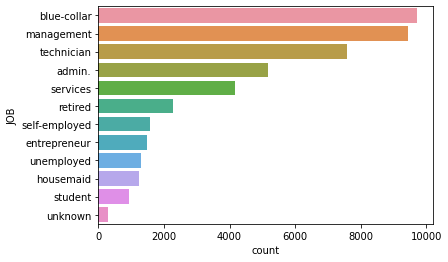

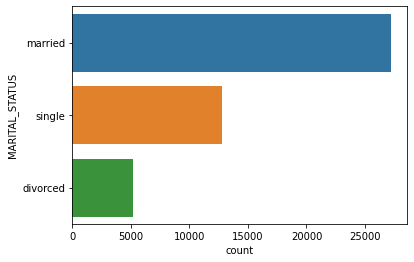

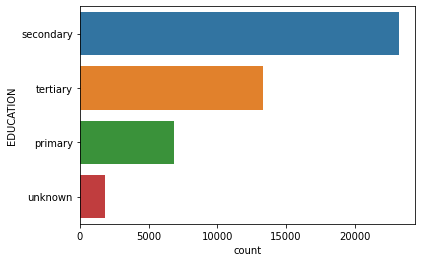

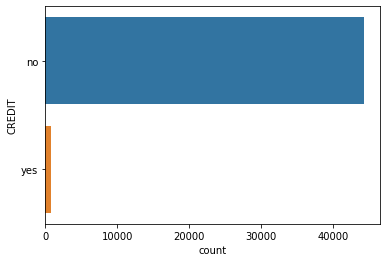

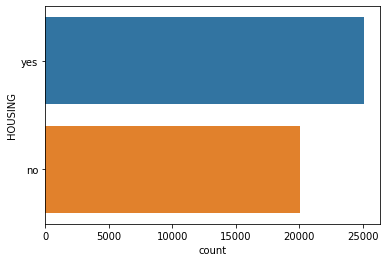

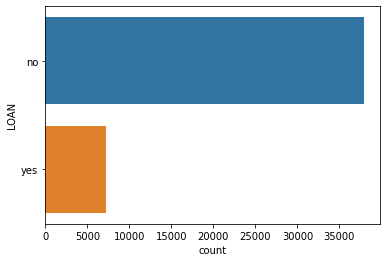

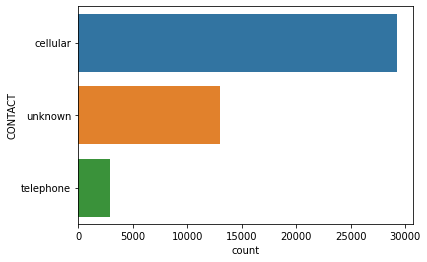

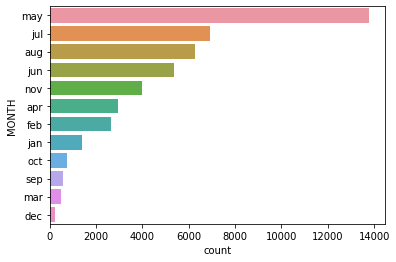

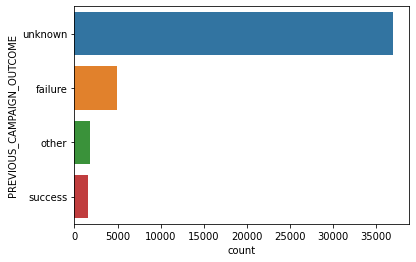

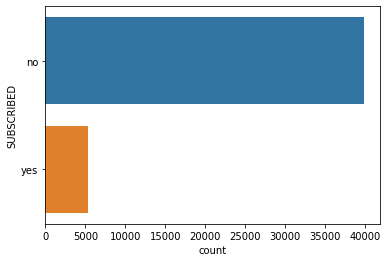

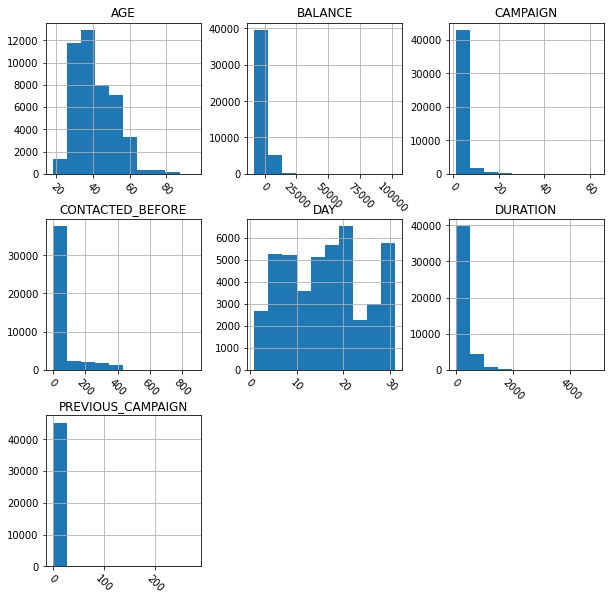

False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AGE                        43193 non-null  int64 
 1   JOB                        43193 non-null  object
 2   MARITAL_STATUS             43193 non-null  object
 3   EDUCATION                  43193 non-null  object
 4   CREDIT                     43193 non-null  object
 5   BALANCE                    43193 non-null  int64 
 6   HOUSING                    43193 non-null  object
 7   LOAN                       43193 non-null  object
 8   CONTACT                    43193 non-null  object
 9   DAY                        43193 non-null  int64 
 10  MONTH                      43193 non-null  object
 11  DURATION                   43193 non-null  int64 
 12  CAMPAIGN                   43193 non-null  int64 
 13  CONTACTED_BEFORE           43193 non-null  int64 
 14 

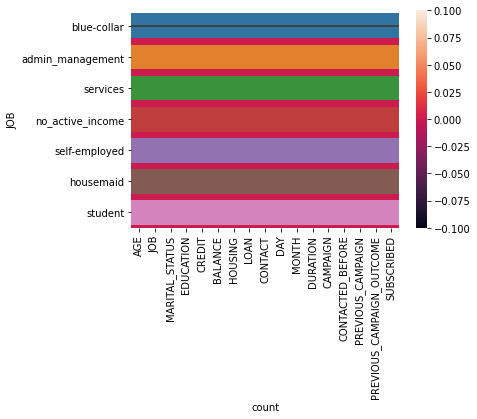

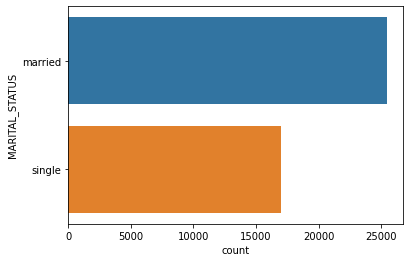

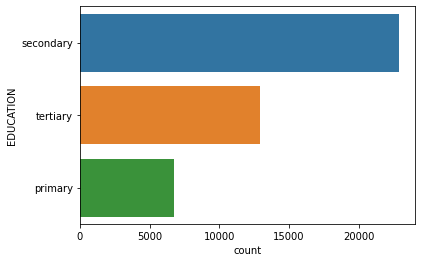

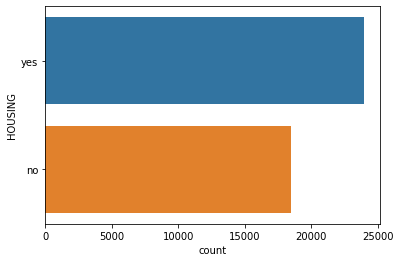

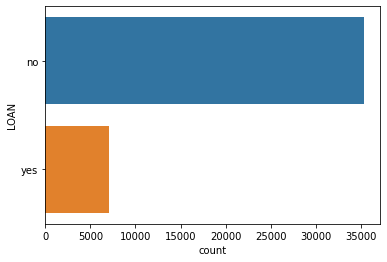

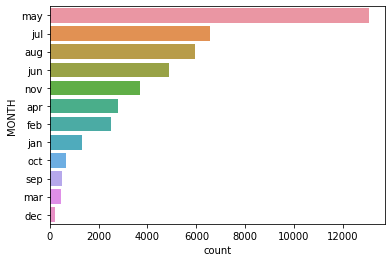

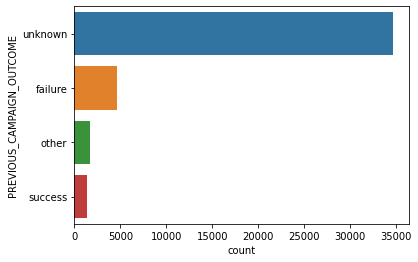

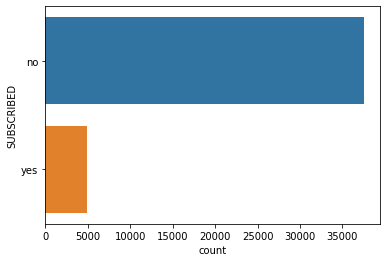

   AGE  JOB  ...  PREVIOUS_CAMPAIGN_OUTCOME  SUBSCRIBED
0   58    2  ...                          0           0
1   44    1  ...                          0           0
2   33    5  ...                          0           0
5   35    2  ...                          0           0
6   28    2  ...                          0           0

[5 rows x 17 columns]
   AGE  JOB  ...  PREVIOUS_CAMPAIGN_OUTCOME  SUBSCRIBED
0   58    2  ...                          0           0
1   44    1  ...                          0           0
2   33    5  ...                          0           0
5   35    2  ...                          0           0
6   28    2  ...                          0           0

[5 rows x 17 columns]
All independent features shape: (42484, 16)
Dependent features shape: (42484,)
[]
Done
184.35563457621794
x_train shape: (33987, 16)
y_train shape: (33987,)
x_test shape: (8497, 16)
y_test shape: (8497,)
Training 
 -------------------------------------------------------------------

In [219]:
if __name__ == "__main__":
    data=pd.read_csv('/bank-full.csv')
    data.head()
    data_visualization(data)
    data_frame=cleaning(data)
    print(data_frame.head())
    x_train, y_train, x_test, y_test=pre_processing(data_frame)
    model,num=train(x_train, y_train)
    test(model, x_test,num)
    